# Ejercicios para practicar
## Sesión 8A

En la sesión 8A hemos discutido sobre ecuaciones diofánticas lineales, y aquí investigaremos sobre algunas otras ecuaciones diofánticas.

-------

### Parte I: Ecuaciones diofánticas de grado 2: circunferencias

Queremos resolver ecuaciones de la forma $x^2+y^2=n$, con $n\ge 0$ entero. Obviamente existe solo una cantidad finita de soluciones enteras, puesto que necesariamente $x,y\le\sqrt{n}$: basta mirar el dibujo que verás al ejecutar la celda siguiente (en la que, de paso, aprendemos a representar ecuaciones implícitas; observa el uso de $\texttt{implicit}$_$\texttt{plot}$ para dibujar la circunferencia $x^2+y^2==n$, con la correspondiente declaración previa de variables para que SageMath entienda la ecuación).

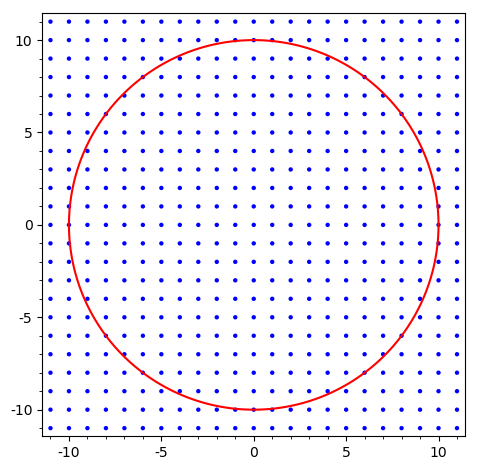

In [30]:
#Ejecuta esto para visualizar gráficamente qué estamos haciendo
n=100
tope=sqrt(n)+1
Reticulo=[(i,j) for i in [-tope..tope] for j in [-tope..tope]]

var('x y')
points(Reticulo)+implicit_plot(x^2+y^2==n,(x,-tope,tope), (y,-tope,tope),color='red')

Las soluciones son los puntos $(x,y)$ que caen exactamente sobre la correspondiente circunferencia. Podemos tratar de encontrar todas las soluciones *por fuerza bruta* (es decir, simplemente probando cuáles de los valores posibles de $x$ e $y$ producen, efectivamente, soluciones).

Vemos que si se lo hacemos en el caso  $n=5\cdot 13\cdot 17\cdot 29\cdot 37\cdot 41=48612265$ se tarda bastante (en estos ordenadores, quizá más de veinte segundos), y si lo intentamos con $n=5\cdot 13\cdot 17\cdot 29\cdot 37\cdot 41\cdot 53 \cdot 61=157163452745$ nos cansamos de esperar.

In [38]:
#SOLUCIÓN POR FUERZA BRUTA PARA ENCONTRAR LAS SOLUCIONES CON x,y AMBOS POSITIVOS
def SumCuad1(n):
    Sol=[]
    for a in [0..int(sqrt(n))]:
        for b in [0..int(sqrt(n))]:
            if a**2+b**2==n: Sol.append((a,b))

    return len(Sol), Sol

In [39]:
SumCuad1(100)

(4, [(0, 10), (6, 8), (8, 6), (10, 0)])

In [51]:
n1=5*13*17*29*37*41
soluciones=SumCuad1(n1)
print('Para n = 5*13*17*29*37*41 hay %s soluciones con ambas coordenadas positivas, y son estas: \n %s' %soluciones )

Para n = 5*13*17*29*37*41 hay 64 soluciones con ambas coordenadas positivas, y son estas: 
 [(59, 6972), (132, 6971), (531, 6952), (581, 6948), (627, 6944), (876, 6917), (1008, 6899), (1284, 6853), (1588, 6789), (1659, 6772), (1723, 6756), (2092, 6651), (2136, 6637), (2317, 6576), (2373, 6556), (2736, 6413), (2757, 6404), (2803, 6384), (3072, 6259), (3164, 6213), (3333, 6124), (3469, 6048), (3704, 5907), (3821, 5832), (4028, 5691), (4077, 5656), (4136, 5613), (4371, 5432), (4596, 5243), (4668, 5179), (4712, 5139), (4851, 5008), (5008, 4851), (5139, 4712), (5179, 4668), (5243, 4596), (5432, 4371), (5613, 4136), (5656, 4077), (5691, 4028), (5832, 3821), (5907, 3704), (6048, 3469), (6124, 3333), (6213, 3164), (6259, 3072), (6384, 2803), (6404, 2757), (6413, 2736), (6556, 2373), (6576, 2317), (6637, 2136), (6651, 2092), (6756, 1723), (6772, 1659), (6789, 1588), (6853, 1284), (6899, 1008), (6917, 876), (6944, 627), (6948, 581), (6952, 531), (6971, 132), (6972, 59)]


In [43]:
#El comando cputime sirve para medir el tiempo transcurrido en el cálculo
t=cputime() #Es como poner el reloj a cero
SumCuad1(n1)
cputime(t) #Da el tiempo transcurrido desde que pusimos el reloj a cero. 
#Observa que al ejecutar esta celda no se muestra el output generado por el código que hay desde la linea t=cputime() hasta la linea cputime(t) 

#También se puede escribir walltime en vez de cputime en las líneas primera y tercera: 
#es una medición del tiempo algo diferente, pero en muchos casos da un resultado muy similar

23.379682999999886

In [ ]:
#Ejecuta, pero probablemente tendrás que abortar el cálculo tras cansarte de esperar un rato
n2=5*13*17*29*37*41*53*61
SumCuad1(n2)

______
Vamos a intentar hacerlo de forma algo más sofisticada y menos *bruta*.

**Ejercicio 1** 
    
**a)** Escribe un programa $\texttt{SumCuad2(n)}$ que utilice un solo $\texttt{for}$ y que, dado un entero $n\ge0$, encuentre las soluciones de $x^2+y^2=n$ con $x,y\ge 0$ enteros y te diga cuántas soluciones hay. 

(Idea: que el ciclo $\texttt{for}$ recorra todos los valores posibles para x: ¿qué debe pasar para que haya un y correcto para el x dado? ¿hay algún comando de sage que te sirva?)

Utiliza tu programa para encontrar cuántas soluciones con las condiciones indicadas tienen las ecuaciones

$$x^2+y^2=48612265 \ (= \ 5\cdot 13\cdot 17\cdot 29\cdot 37\cdot 41), \qquad x^2+y^2=157163452745 \ (= \ 5\cdot 13\cdot 17\cdot 29\cdot 37\cdot 41\cdot 53 \cdot 61).$$

(Tu programa debe ser lo suficientemente eficaz como para resolver estas ecuaciones).


**b)** Representa gráficamente las soluciones de las dos ecuaciones del apartado anterior. Cuando lo hagas observarás que no est&aacute;n equidistribuidas.

-----------------

<p><strong>Ejercicio 2.-</strong> Est&aacute; claro que $x^2+y^2=2$ tiene una &uacute;nica soluci&oacute;n en enteros $x,y\ge0$: $(1,1)$.</p>

**a)** Encuentra cu&aacute;ntas soluciones&nbsp;en enteros $x,y\ge0$ tiene la ecuaci&oacute;n&nbsp;$x^2+y^2=p$ para cada uno de los primos $p$ con $3\le p\le 200$. (Puede ser útil usar el comando prime_range).

<p>SUGERENCIA: Para verlo bien, escribe los pares ($p$, n&uacute;mero de soluciones de&nbsp;$x^2+y^2=p$), y representa gráficamente dichos pares.</p>
<p>&iquest;Puedes hacer una conjetura para cu&aacute;ndo la ecuaci&oacute;n&nbsp;&nbsp;$x^2+y^2=p$, con $p$ primo, tiene soluci&oacute;n entera? La respuesta se llama a veces <strong><em>Teorema de Navidad de Fermat.</em></strong></p>

La conjetura obvia es que $x^2+y^2=p$, con $p$ es primo, tiene soluciones (enteras) $\iff$ $p=2$ o $p\equiv 1 \mod 4$.

Esto es cierto (*Teorema de Navidad de Fermat*) y, además la solución, si existe, es única salvo simetrías (por eso con $x,y\ge 0$ tenemos una para $p=2$ y dos para los $p\equiv 1 \mod 4$ impares), pero no lo vamos a demostrar.

**b)** Representa gráficamente los pares ($p$, número de soluciones de $x^2+y^2=p$) para $3\le p \le 1000$, pintando de un color los puntos con $p\equiv 1 \mod 4$ y con un color distinto aquellos para los que $p\equiv 3 \mod 4$. Observa que la figura muestra (que no demuestra) que la conjetura es cierta para este rango de primos.

El mejor análisis del número de soluciones enteras de $x^2+y^2=n$ para $n$ general se hace estudiando la factorización (única) en el conocido como *anillo de los enteros de Gauss* $\mathbb Z[i]=\{m+ni \mid m,n \in \mathbb Z\} (\subset \mathbb C)$.

De este estudio se deduce que el número de soluciones depende, no del tamaño de $n$, sino de cómo se descompone (si es par o impar, y de sus factores primos congruentes con 1 o 3 módulo 4). Por tanto el número de soluciones parece variar "aleatoriamente" (no es aleatorio, porque sabemos exactamente de qué depende) cuando $n$ crece. Vamos, de nuevo, a mostrarlo con un dibujo.

**Ejercicio 3**.- Representa gráficamente cómo varía el número de soluciones de $x^2+y^2=n$ (con $x\ge0, y\ge 0$) cuando $n$ va de $1$ a $10\, 000$.

-------

### Parte II: Ecuaciones diofánticas de grado 2: hipérbolas con semiejes $\sqrt{n}$

Queremos resolver ahora ecuaciones de la forma $x^2-y^2=n$, con $n$ entero.

Vamos a suponer $n>0$ porque $n=0$ da dos rectas (no una hipérbola) y el comportamiento es muy distinto, mientras que si $n<0$ podríamos considerar $y^2-x^2=-n$, que es del mismo tipo.

Como para la circunferencia, al ser los términos de la ecuación cuadráticos, nos limitamos a $x\ge 0$, pero admitimos en principio $y$ negativo para ver mejor la hipérbola (aunque luego haremos un ejercicio requiriendo $y\ge 0$).

Si hacemos ahora un dibujo (**¿por qué hemos puesto $\texttt{10*tope}$ en los rangos de la función? ¿por qué hemos puesto $\texttt{tope}$, pero $\texttt{(10*i,10*j)}$ en el retículo?**), no es evidente que la ecuación tenga una cantidad finita de soluciones enteras, ya que no es obvio que $x,y$ tengan que estar acotados (de hecho no lo están si buscamos soluciones reales): podrían ser $x,y$ grandes a la vez y que hubiese cancelación.

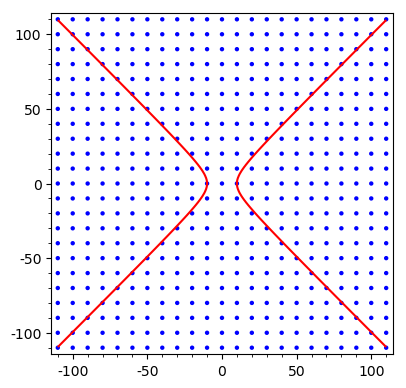

In [43]:
#Ejecuta esto
N=100
tope=sqrt(N)+1
Reticulo=[(10*i,10*j) for i in [-tope..tope] for j in [-tope..tope]]

var('x y')
points(Reticulo)+implicit_plot(x^2-y^2==N,(x,-10*tope,10*tope), (y,-10*tope,10*tope),color='red')

<p>La mejor forma de convencerse de que para las soluciones enteras de $x^2-y^2=n$ hay realmente una cota, es un argumento de divisibilidad.</p>
<p>Se tiene&nbsp;$x^2-y^2=n \iff (x+y)(x-y)=n$, y por tanto $x+y, x-y$ deben ambos ser divisores de $n$. Poniendo&nbsp;$x-y=d,x+y=\frac nd$ para un divisor $d$ de $n$, concluimos que las soluciones son de la forma</p>
<p>$$x=\frac{(n/d)+d}{2}, \quad y=\frac{(n/d)-d}{2}.$$</p>
<p><strong>IMPORTANTE:</strong> observa que, para que $x,y$ sean enteros, debe haber una condici&oacute;n sobre las&nbsp;<strong>paridades</strong> de $d$ y $\frac nd$.</p>

**Ejercicio 4**

**a)** Escribe un programa que&nbsp;, dado un entero $n>0$, encuentre las soluciones de $x^2-y^2=n$ con $x,y$ enteros y &nbsp;$x\ge 0$ (para simplificar el programa, admitimos que $y$ sea negativo), y&nbsp;te diga cu&aacute;ntas soluciones hay.</p>
<p>Utiliza tu programa para encontrar cu&aacute;ntas soluciones con las condiciones indicadas tienen las ecuaciones&nbsp;</p>
<p>$$x^2-y^2=48612265(=5\cdot 13\cdot 17\cdot 29\cdot 37\cdot 41), \qquad x^2-y^2=3240000(=2^6\cdot 3^4\cdot 5^4),$$</p>
<p>$$x^2-y^2=16540098570304(=2^6\cdot 23^4\cdot 31^4), \qquad x^2-y^2=200000000000000000078(=2\cdot100000000000000000039)$$</p>
<p>(Tu programa debe ser lo suficientemente eficaz como para resolver las ecuaciones).</p>

Finalmente, dibuja las soluciones de las ecuaciones anteriores, junto a la gráfica de la hipérbola (¿qué rangos son adecuados para $x,y$?). Observa que las soluciones no están equidistribuidas.


<p>Vemos que el n&uacute;mero de soluciones de cada ecuaci&oacute;n (con las condiciones que hemos impuesto)&nbsp;es, respectivamente, $96,125,125,0$.</p>
<p>Como para la circunferencia, el n&uacute;mero de puntos enteros en la hip&eacute;rbola $x^2-y^2=n$ no depende del tama&ntilde;o de $n$, sino de sus propiedades aritm&eacute;ticas, en este caso el n&uacute;mero de divisores de $n$, lo que de nuevo da un comportamiento "aleatorio" (aparentemente, aunque no lo es).</p>

**Ejercicio 5**

**a)** Representa gr&aacute;ficamente c&oacute;mo var&iacute;a el n&uacute;mero de soluciones enteras (con $x\ge0$) de&nbsp;$x^2-y^2=n$ cuando $n$ va de $1$ a $10\, 000$.</p>


**b)** ¿Cuántas soluciones tiene la ecuación $x^2-y^2=2$? Explica este resultado.

**c)** Representa gr&aacute;ficamente c&oacute;mo var&iacute;a el n&uacute;mero de soluciones enteras (con $x\ge0$) de&nbsp;$x^2-y^2=p$ cuando $p$ es primo $2\le p \le 1000$. <strong>Explica lo que ves.</strong></p>

**Ejercicio 6** 

**a)** Modifica el programa de manera que d&eacute; y cuente **sólo** las soluciones enteras de $x^2-y^2=n$ que tengan $x\ge 0$ y **tambi&eacute;n** $y\ge 0$.

**SUGERENCIA** ¿Para qué divisores $d$ tenemos $y\ge 0$?



**b)** Compara el n&uacute;mero de soluciones que da cada uno de los dos programas para $n=15, 225, 6, 12, 36$.</p>
<p>En general, &iquest;qu&eacute; propiedad caracteriza los $n$ para los que el n&uacute;mero de soluciones con $x,y\ge 0$&nbsp;<strong>no</strong> es exactamente la mitad del n&uacute;mero de soluciones si s&oacute;lo imponemos con $x\ge 0$?</p>